In [2]:
D <- read.csv("DST_BIL54.csv")
str(D)
# See the help
# ?strftime
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
class(D$time)

## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12

## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6

## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]


'data.frame':	84 obs. of  13 variables:
 $ time        : chr  "2018-01" "2018-02" "2018-03" "2018-04" ...
 $ total       : int  2930483 2934044 2941422 2951498 2963093 2973721 2976096 2985537 2983209 2982473 ...
 $ gasoline    : int  1781826 1783338 1787219 1793554 1799795 1805170 1806338 1810615 1808496 1806710 ...
 $ diesel      : int  1136656 1138414 1141576 1144846 1149840 1154651 1155420 1159907 1159418 1160162 ...
 $ fgas        : int  12 12 12 12 12 12 12 12 11 11 ...
 $ ngas        : int  256 255 257 257 256 262 262 261 261 263 ...
 $ electricity : int  9304 9343 9399 9548 9665 9807 9853 10002 10120 10236 ...
 $ petroleum   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hydrogen    : int  81 80 77 77 77 77 77 80 82 82 ...
 $ methanol    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ethanol     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pluginhybrid: int  2340 2593 2873 3195 3439 3734 4126 4652 4812 5000 ...
 $ otherfuels  : int  8 9 9 9 9 8 8 8 9 9 ...


[1] "POSIXct" "POSIXt"

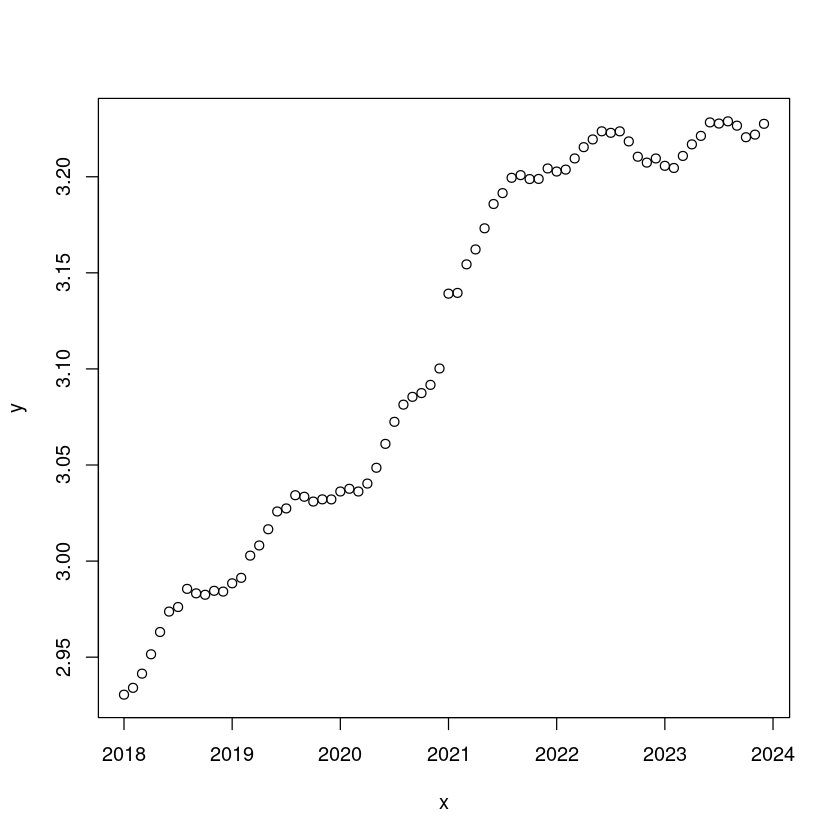

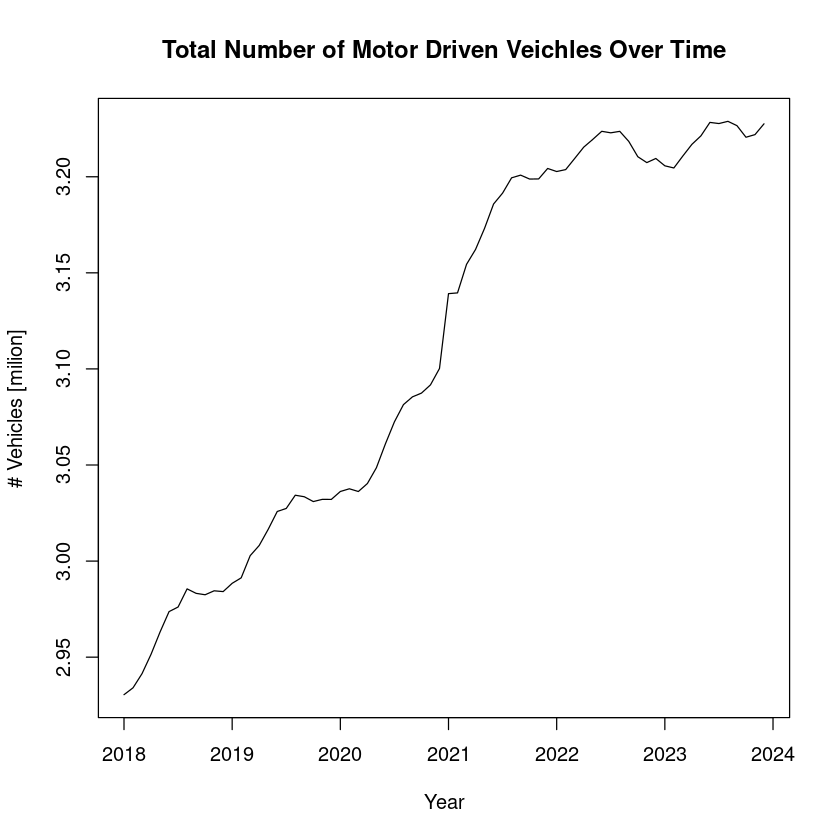

In [3]:
par(bg = "white")
x <- Dtrain$year # # Extracts it as a numeric vector
y <- Dtrain$total
plot(x,y)
matplot(Dtrain$year, Dtrain$total, type = "l", lty = 1, 
        xlab = "Year", ylab = "# Vehicles [milion]", main = "Total Number of Motor Driven Veichles Over Time")

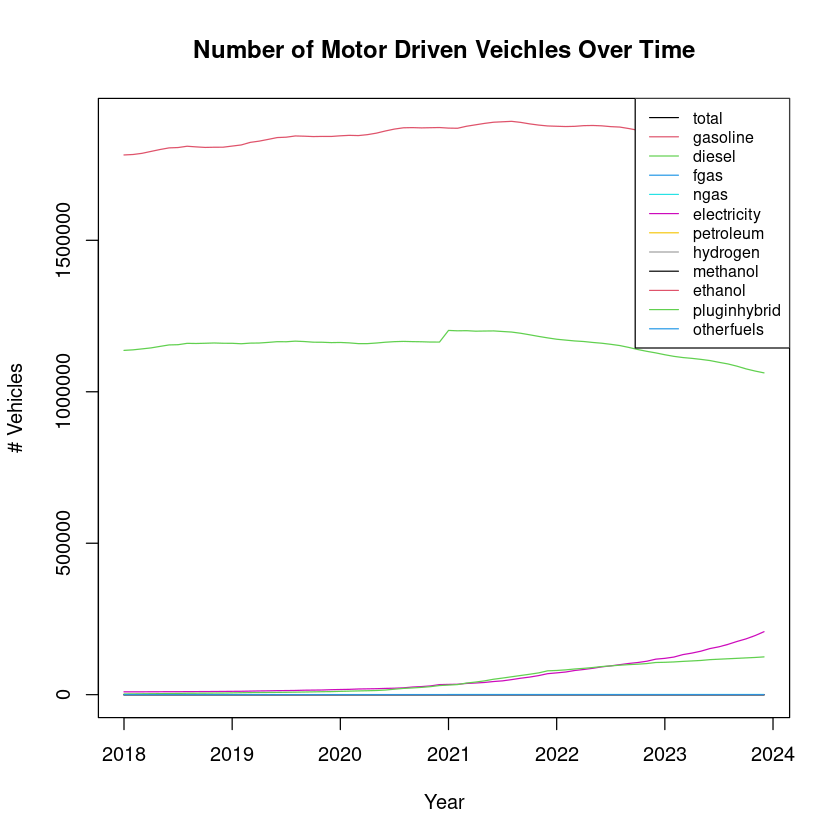

In [4]:
par(bg = "white")

# Define x and remove it from the dataframe to plot only numeric columns
x <- Dtrain$year
y_data <- Dtrain[, !names(Dtrain) %in% c("year","time")]  # Remove some of the columns

# Plot all columns against x
matplot(x, y_data, type = "l", lty = 1, col = 1:ncol(y_data), 
        xlab = "Year", ylab = "# Vehicles", main = "Number of Motor Driven Veichles Over Time")

# Add legend using column names
legend("topright", legend = colnames(y_data), col = 1:ncol(y_data), lty = 1, cex = 0.8)


[1] 2018.000 2018.083 2018.167
[1] 2.930483 2.934044 2.941422
[1] "Parameters"
            [,1]
   -110.35542810
xx    0.05614456


             [,1]
[1,] 0.0006828257
[1] "Covariance matrix"
                           xx
   12.913825277 -6.389947e-03
xx -0.006389947  3.161840e-06
[1] 12.91383
[1] NA
[1] 3.593581
[1] NA


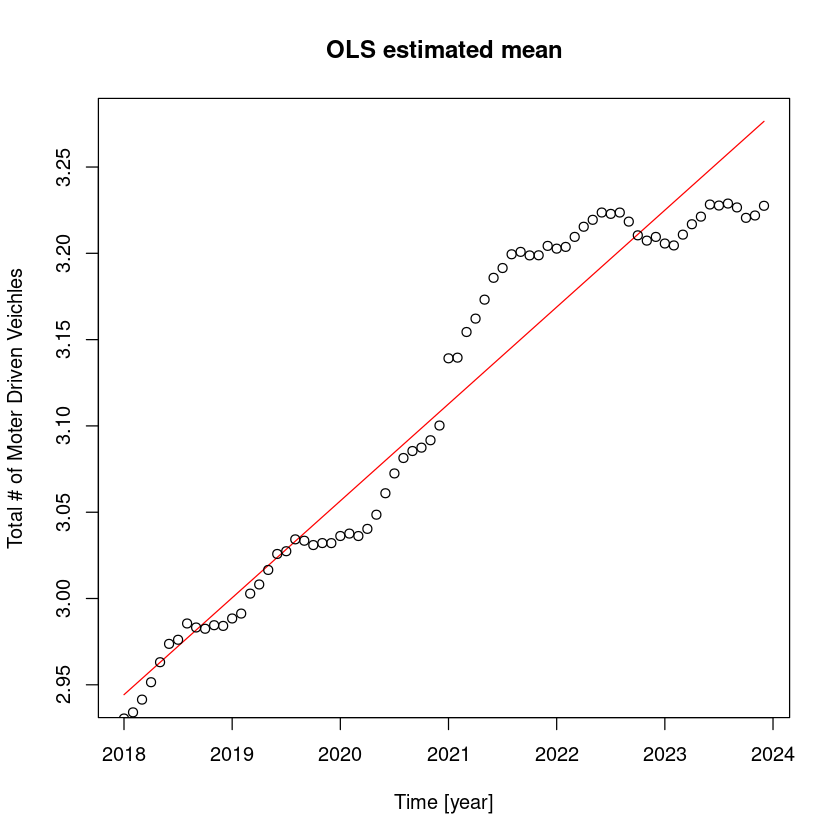

In [5]:
xx <- Dtrain$year # # Extracts it as a numeric vector
y <- Dtrain$total
print(x[1:3])
print(y[1:3])

x <-cbind(1,xx)
parameters <- solve(t(x)%*%x)%*%t(x)%*%y
print("Parameters")
print(parameters)

# epsilon 
epsilon <- y -x%*%parameters

# An unbiased estimate of σ2 is from Theorem 3.4 (3.44)
N <- length(y) # number of observations
p <- length(parameters) # number of parameters?? 
sig2 <- t(epsilon)%*%epsilon/(N-p)
print(sig2)

var_parameters <- as.numeric(sig2)*solve(t(x)%*%x)# covariance matrix
print("Covariance matrix")
print(var_parameters)

# estimated standard errors of the parameters
print(var_parameters[1][1])
print(var_parameters[2][2])
print(sqrt(var_parameters[1][1]))
print(sqrt(var_parameters[2][2]))
# plot the estimated mean as a line with the observations as points.

par(bg = "white")
plot(xx,parameters[1]+parameters[2]*xx, type = 'l',xlab = 'Time [year]',
ylab = 'Total # of Moter Driven Veichles', main = 'OLS estimated mean',col = 'red')
points(xx,y)

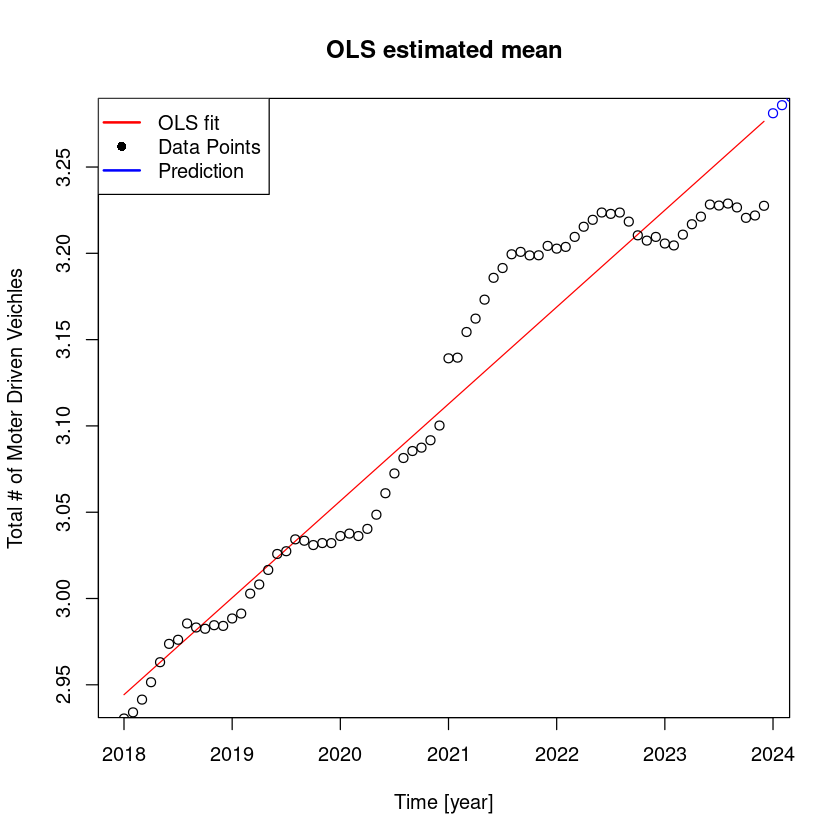

In [18]:
# Make a forecast for the next 12 months - i.e., compute predicted values with corresponding
# prediction intervals. Present these values in a table

#prediction
xx_new12 <- xx[length(xx)]+seq(1,12,1)/12
x_new12 <- cbind(1,xx_new12)
y_pred12 <- x_new12%*%parameters

#prediction intervals

#variance of prediction error

par(bg = "white")
plot(xx,parameters[1]+parameters[2]*xx, type = 'l',xlab = 'Time [year]',
ylab = 'Total # of Moter Driven Veichles', main = 'OLS estimated mean',col = 'red')
points(xx,y)
points(xx_new12,y_pred12,col = 'blue')
legend("topleft", legend = c("OLS fit", "Data Points","Prediction"), 
       col = c("red", "black","blue"), lty = c(1, NA), pch = c(NA, 16), lwd = 2)

In [1]:
 install.packages("xtable") #if you havent installed it yet


The downloaded binary packages are in
	/var/folders/c_/h8_8mtln0_d8qc9w1k__4g2w0000gn/T//RtmpaTPGJw/downloaded_packages


In [17]:
# Convert to LaTeX table

library(xtable)
data_table <- data.frame(xx_new12, y_pred12)
latex_table <- xtable(data_table, type = "latex")

print(latex_table, file = "table_2_3.tex", include.rownames = FALSE)# Print to .tex file
